In [5]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('all_data.csv')
df=df.drop('Unnamed: 0',axis=1)

In [7]:
df

,year_,month_,day_,humidity_min,humidity_max,humidity_mean,temperature_min,temperature_max,temperature_mean,weight_min,weight_max,weight_mean
0,2017,1,1,90.945000,93.768333,92.058947,-5.1744,6.050467,-0.082160,52.361100,52.761200,52.661690
1,2017,1,2,92.130000,93.533333,92.794722,-2.4640,8.452600,1.825578,52.569200,52.761200,52.671111
2,2017,1,3,87.871667,92.716667,91.173472,-0.5704,10.064000,3.082557,52.089100,52.953200,52.653767
3,2017,1,4,88.841667,93.055000,91.077917,-0.6370,9.798667,3.750071,51.897000,52.953200,52.610835
4,2017,1,5,75.839333,89.576667,82.656076,-4.6214,9.566917,2.259225,52.505100,52.729200,52.623591
...,...,...,...,...,...,...,...,...,...,...,...,...
1598,2019,5,27,91.544167,92.309861,91.927014,34.4340,35.484000,34.675375,75557.024444,75676.160556,75616.592500
1599,2019,5,28,92.289444,92.856806,92.573125,34.2640,35.496000,34.636979,75154.139583,75286.206389,75220.172986
1600,2019,5,29,92.868333,94.190694,93.529514,33.9160,34.864000,34.355271,74787.553194,74938.619028,74863.086111
1601,2019,5,30,94.770694,94.897222,94.833958,33.6240,34.868000,34.290264,74587.528333,75265.285694,74926.407014


In [8]:
"""
Here I create the dataset for training. The dataset takes 7 days of weather
information (humidity and temperature) added to columns with months of the data.
"""
len_window = 7
X = []
y = []
for i in range(len(df)):
    row_i = [df.loc[i, 'month_']]
    weight_i = df.loc[i, 'weight_mean']
    if i+len_window > len(df):
        break
    for j in range(len_window):
        row_i = row_i+[df.loc[i+j, 'humidity_min'],
                       df.loc[i+j, 'humidity_max'],
                       df.loc[i+j, 'humidity_mean'],
                       df.loc[i+j, 'temperature_min'],
                       df.loc[i+j, 'temperature_max'],
                       df.loc[i+j, 'temperature_mean']]
        if j == (len_window-1):
            weight_f = df.loc[i+j, 'weight_mean']
            delta_weight = ((weight_f-weight_i)/weight_i)*100
            if delta_weight > 100:
                delta_weight = 100.
            if delta_weight < -100:
                delta_weight = -100.
            y.append(delta_weight)
            X.append(row_i)
data_model_full = pd.DataFrame(X)
data_model_full['y'] = pd.Series(y)


In [9]:
data_model_full

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,y
0,1,90.945000,93.768333,92.058947,-5.1744,6.050467,-0.082160,92.130000,93.533333,92.794722,...,-8.7460,18.896000,-0.937771,81.615000,93.590000,89.077361,-10.0720,9.365183,-2.648782,-0.525869
1,1,92.130000,93.533333,92.794722,-2.4640,8.452600,1.825578,87.871667,92.716667,91.173472,...,-10.0720,9.365183,-2.648782,89.520000,90.816667,90.131181,-3.8698,7.731600,1.812449,-0.040630
2,1,87.871667,92.716667,91.173472,-0.5704,10.064000,3.082557,88.841667,93.055000,91.077917,...,-3.8698,7.731600,1.812449,89.081667,90.948333,90.166528,0.6620,9.885500,3.659525,-0.067327
3,1,88.841667,93.055000,91.077917,-0.6370,9.798667,3.750071,75.839333,89.576667,82.656076,...,0.6620,9.885500,3.659525,82.250000,89.778333,86.372014,-1.4738,13.534500,4.034587,-0.068585
4,1,75.839333,89.576667,82.656076,-4.6214,9.566917,2.259225,87.911667,93.686667,91.545347,...,-1.4738,13.534500,4.034587,84.926667,91.686667,87.873681,-0.1502,11.806167,4.752350,-0.281404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,5,88.637014,88.640556,88.638785,34.8760,36.844000,35.154313,88.724583,89.199167,88.961875,...,34.4480,35.698000,34.873243,91.544167,92.309861,91.927014,34.4340,35.484000,34.675375,-4.049981
1593,5,88.724583,89.199167,88.961875,34.9180,35.386000,35.142361,88.111405,90.126389,89.118897,...,34.4340,35.484000,34.675375,92.289444,92.856806,92.573125,34.2640,35.496000,34.636979,-3.226886
1594,5,88.111405,90.126389,89.118897,35.0400,35.648000,35.298767,87.669444,88.241806,87.955625,...,34.2640,35.496000,34.636979,92.868333,94.190694,93.529514,33.9160,34.864000,34.355271,-3.090329
1595,5,87.669444,88.241806,87.955625,34.8400,35.570000,35.222028,87.440694,87.707500,87.574097,...,33.9160,34.864000,34.355271,94.770694,94.897222,94.833958,33.6240,34.868000,34.290264,-3.007078


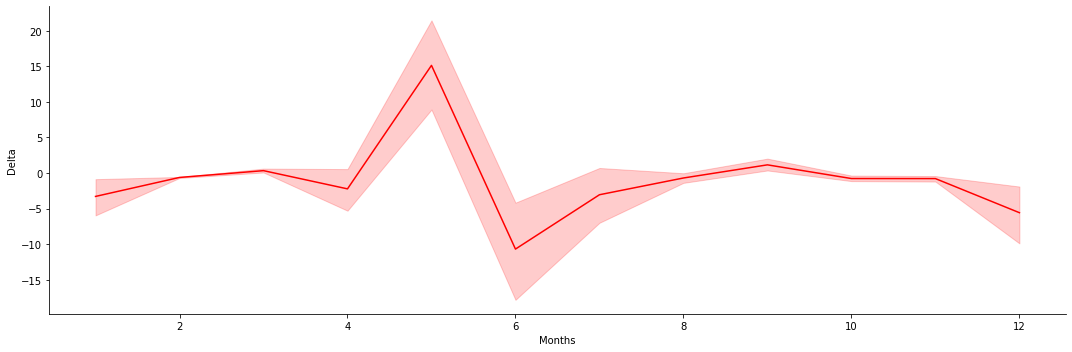

In [10]:
# Plotting target
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.relplot(x=0, y="y", data=data_model_full, height=5,
                 kind="line", aspect=3, color='red')
ax.set(xlabel='Months', ylabel='Delta')
plt.savefig("target.png", dpi=300)
plt.show()


In [11]:
# Drop null values
data_model_full = data_model_full.dropna()


In [12]:
col_name = ["month"]
for day in range(7):
    col_name.append("Hmin_"+str(day))
    col_name.append("Hmax_"+str(day))
    col_name.append("Hmean_"+str(day))
    col_name.append("Tmin_"+str(day))
    col_name.append("Tmax_"+str(day))
    col_name.append("Tmean_"+str(day))
col_name.append("delta_w")
data_model_full.columns = col_name
data_model_full.head()

,month,Hmin_0,Hmax_0,Hmean_0,Tmin_0,Tmax_0,Tmean_0,Hmin_1,Hmax_1,Hmean_1,...,Tmin_5,Tmax_5,Tmean_5,Hmin_6,Hmax_6,Hmean_6,Tmin_6,Tmax_6,Tmean_6,delta_w
0,1,90.945000,93.768333,92.058947,-5.1744,6.050467,-0.082160,92.130000,93.533333,92.794722,...,-8.7460,18.896000,-0.937771,81.615000,93.590000,89.077361,-10.0720,9.365183,-2.648782,-0.525869
1,1,92.130000,93.533333,92.794722,-2.4640,8.452600,1.825578,87.871667,92.716667,91.173472,...,-10.0720,9.365183,-2.648782,89.520000,90.816667,90.131181,-3.8698,7.731600,1.812449,-0.040630
2,1,87.871667,92.716667,91.173472,-0.5704,10.064000,3.082557,88.841667,93.055000,91.077917,...,-3.8698,7.731600,1.812449,89.081667,90.948333,90.166528,0.6620,9.885500,3.659525,-0.067327
3,1,88.841667,93.055000,91.077917,-0.6370,9.798667,3.750071,75.839333,89.576667,82.656076,...,0.6620,9.885500,3.659525,82.250000,89.778333,86.372014,-1.4738,13.534500,4.034587,-0.068585
4,1,75.839333,89.576667,82.656076,-4.6214,9.566917,2.259225,87.911667,93.686667,91.545347,...,-1.4738,13.534500,4.034587,84.926667,91.686667,87.873681,-0.1502,11.806167,4.752350,-0.281404


In [13]:
# Division in features and target
X = data_model_full.drop('delta_w', axis=1)
y = data_model_full['delta_w']

In [14]:
# Libraries for different models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [15]:
# Divide in train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


In [16]:
# Function for train the model and optimize the parameters
def train_model(model, param, n_cv, X, y):
    """
    This function train the model
    Args:
        model: sklearn model
        param: dictionary with parameters for the Grid Search
        n_cv: number of folds for the cross validation
        X: features
        y: target
    Return:
        Trained model
    """
    gs = GridSearchCV(model, param, cv=n_cv, n_jobs=-1)
    gs.fit(X, y)
    return gs


In [17]:
from sklearn.metrics import mean_squared_error


def evaluate_regressor(model, y_true, y_pred):
    """
    This function evaluates the regressor with the root mean square error
    Args:
        model: sklearn model to evaluate
        y_true: true data
        y_pred: predicted data
    Return:
        Root mean square error
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse


In [18]:
# Standard scalar for features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [25]:
# Gradient Boosting
gbr = GradientBoostingRegressor()
parameters_gb ={"learning_rate":[0.1],
                "n_estimators":[30],
                "min_samples_split":[2,4,8],
                "min_samples_leaf":[1,5],
                "max_depth":[3,5,10]
               }
model = train_model(gbr,parameters_gb,5,X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
rmse_train = evaluate_regressor(model,y_train,y_pred_train)
rmse_test = evaluate_regressor(model,y_test,y_pred_test)
print(rmse_train,rmse_test)

10.363429315350347 18.63778866099587


In [26]:
# Random Forest
rfr = RandomForestRegressor()
parameters_rfr ={"n_estimators":[100],
                "min_samples_split":[2,4,8],
                "min_samples_leaf":[1,5],
                "max_depth":[None,3,5],
                 "max_features":["auto","sqrt",4,2],
                 "random_state":[1029]
               }
model = train_model(rfr,parameters_rfr,3,X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
rmse_train = evaluate_regressor(model,y_train,y_pred_train)
rmse_test = evaluate_regressor(model,y_test,y_pred_test)
print(rmse_train,rmse_test)

6.577932888596623 17.874594944319117


In [21]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
param_grid = {"learning_rate": (0.05, 0.10, 0.15),
              "max_depth": [3, 4, 5, 6, 8],
              "min_child_weight": [1, 3, 5, 7],
              "gamma": [0.0, 0.1, 0.2],
              "colsample_bytree": [0.3, 0.4], },
xgb = train_model(xgb_model, param_grid, 3, X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
rmse_train = evaluate_regressor(xgb,y_train,y_pred_train)
rmse_test = evaluate_regressor(xgb,y_test,y_pred_test)
print(rmse_train,rmse_test)

2.8504840674024616 17.059684516517628


In [22]:
# Best parameters
xgb.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_weight': 1}

<Figure size 1440x288 with 0 Axes>

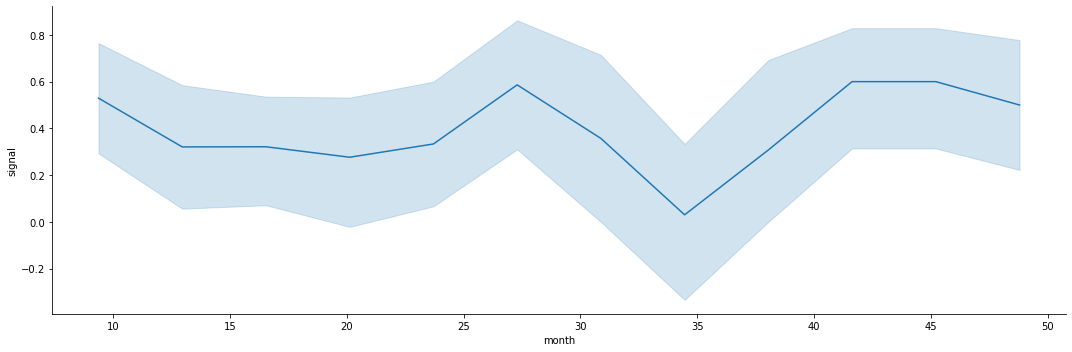

In [24]:
"""
The graph shows the concordance between the prevision of increase or
decrease of honey of the model  and the real values. When both model and real
data show an increase of honey in the next week the values is
equal to 1. Instead when there is a divergence about the prevision 
and the reality the values are equal to -1.
"""
import seaborn as sns
import matplotlib.pyplot as plt
y_pred_test_series = pd.Series(y_pred_test)
y_test_series = y_test.reset_index(drop=True)
month = pd.Series(sc.inverse_transform(X_test)[:,0])
df_predicted = pd.DataFrame()
df_predicted["true"] = y_test_series
df_predicted["predicted"] = y_pred_test
df_predicted["month"] = month
df_predicted["signal"] =  y_test_series*y_pred_test/abs(y_test_series*y_pred_test)
df_predicted = df_predicted.sort_values(by=["month"]).reset_index(drop=True)
plt.figure(figsize=(20,4))
sns.relplot(x='month', y='signal',
            data=df_predicted,
            kind="line",
            height=5,
            aspect=3)
ax.set(xlabel='Months', ylabel='Concordace')
plt.savefig("concordance.png",dpi=300)

NotFittedError: need to call fit or load_model beforehand